In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlalchemy as db
from sqlalchemy import create_engine
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
url = 'sqlite:///spotify.db'

In [3]:
engine = create_engine(url)

In [4]:
songs = pd.read_sql_table('song', engine)
songs

,song_id,name,track_number,disc_number,duration_ms,time_signature,year,release_date
0,0,Downtown Life,1,1,268467,4,1988,7/27/1988
1,1,Everything Your Heart Desires,2,1,300467,4,1988,7/27/1988
2,2,I'm In Pieces,3,1,290467,4,1988,7/27/1988
3,3,Missed Opportunity,4,1,287600,4,1988,7/27/1988
4,4,Talking All Night,5,1,274400,4,1988,7/27/1988
...,...,...,...,...,...,...,...,...
70563,70563,The Secret,9,1,279800,4,2009,9/1/2009
70564,70564,Can't Get Used To Losing You,10,1,259427,4,2009,9/1/2009
70565,70565,Baby's Got a Gun,11,1,257000,4,2009,9/1/2009
70566,70566,Whatcha Think About That,12,1,245173,4,2009,9/1/2009


In [5]:
attributes = pd.read_sql_table('attributes', engine)
attributes.head()

,song_id,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,False,0.660,0.892,-6.545,0,0.0419,0.0971,0.000021,0.3500,0.767,110.089
1,1,False,0.706,0.861,-5.774,1,0.0411,0.1570,0.000001,0.2560,0.887,99.992
2,2,False,0.381,0.824,-6.400,1,0.0408,0.1190,0.000000,0.0826,0.805,87.064
3,3,False,0.765,0.815,-6.931,1,0.0429,0.5230,0.000000,0.0821,0.733,106.063
4,4,False,0.745,0.787,-6.328,1,0.0451,0.2190,0.000110,0.0910,0.902,120.925


In [6]:
# Create one df of songs and explicit value 
    # and another df for song and year
explicit_list = attributes[['song_id', 'explicit']]
song_years = songs[['song_id', 'year']]

In [7]:
explicit_songs= pd.merge(explicit_list, song_years, on='song_id', how='outer')
explicit_songs = explicit_songs.groupby(['year', 'explicit']).count()
#explicit_songs = explicit_songs.groupby(['year']).count()
explicit_songs

song_id
year explicit         
1988 False        3875
     True           94
1999 False       23382
     True          831
2009 False       40517
     True         1869

3D model of Explicit vs Non-Explicit songs per year

(0.0, 6.0, 0.0, 25000.0)

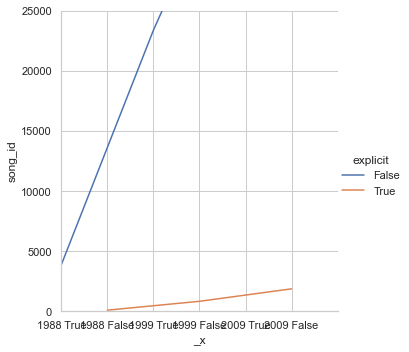

In [16]:
sns.set_theme(style='whitegrid')


sns.relplot(
    data= explicit_songs,
    x=['1988 True', '1988 False', '1999 True', '1999 False', '2009 True', '2009 False'],
    y="song_id",
    hue="explicit",
    kind="line",
)
plt.axis([0, 6,  0, 25000])

In [ ]:
sns.